<a href="https://colab.research.google.com/github/180030814-GnaneshwarReddy/GnaneswaraReddy_INFO5731_Fall2024/blob/main/Palem_Gnaneswara_Excercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [ ]:
import gensim
from gensim.models import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('all')

documents = [
    "I absolutely love this product! It works like a charm and exceeded my expectations.",
    "This is the worst experience I've ever had. Terrible service and awful product.",
    "The product is okay. Nothing special but does the job.",
    "I'm not sure if I like this. It's not what I expected but it's not terrible either."
]

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

texts = [[lemmatizer.lemmatize(word) for word in word_tokenize(doc.lower()) if word.isalpha() and word not in stop_words] for doc in documents]

dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

coherence_scores = []
models = []
for k in range(2, 16):
    lda_model = gensim.models.LdaModel(corpus, num_topics=k, id2word=dictionary, random_state=100, chunksize=10, passes=10)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model_lda.get_coherence()
    coherence_scores.append(coherence_score)
    models.append(lda_model)

optimal_k = coherence_scores.index(max(coherence_scores)) + 2
optimal_model = models[optimal_k - 2]

print("Coherence scores for different topic numbers:")
for i, score in enumerate(coherence_scores, start=2):
    print(f"Number of Topics = {i}, Coherence Score = {score:.4f}")

print(f"\nOptimal number of topics: {optimal_k}")
print("Topics generated by the LDA model:")
topics = optimal_model.print_topics(num_words=5)
for topic_num, topic in topics:
    print(f"Topic {topic_num + 1}: {topic}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_d

Coherence scores for different topic numbers:
Number of Topics = 2, Coherence Score = 0.4007
Number of Topics = 3, Coherence Score = 0.4022
Number of Topics = 4, Coherence Score = 0.4061
Number of Topics = 5, Coherence Score = 0.4034
Number of Topics = 6, Coherence Score = 0.4062
Number of Topics = 7, Coherence Score = 0.4062
Number of Topics = 8, Coherence Score = 0.4061
Number of Topics = 9, Coherence Score = 0.4046
Number of Topics = 10, Coherence Score = 0.4063
Number of Topics = 11, Coherence Score = 0.4057
Number of Topics = 12, Coherence Score = 0.4049
Number of Topics = 13, Coherence Score = 0.3906
Number of Topics = 14, Coherence Score = 0.3906
Number of Topics = 15, Coherence Score = 0.3906

Optimal number of topics: 10
Topics generated by the LDA model:
Topic 1: 0.155*"like" + 0.155*"terrible" + 0.155*"expected" + 0.155*"sure" + 0.155*"either"
Topic 2: 0.048*"product" + 0.048*"okay" + 0.048*"like" + 0.048*"terrible" + 0.048*"expected"
Topic 3: 0.048*"product" + 0.048*"like" 

## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [ ]:
import nltk
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from nltk.stem import WordNetLemmatizer
import numpy as np

nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(texts):
    processed_texts = []
    for doc in texts:
        tokens = [lemmatizer.lemmatize(word.lower()) for word in doc.split() if word.lower() not in stop_words]
        processed_texts.append(" ".join(tokens))
    return processed_texts

texts = ["I absolutely love this product! It works like a charm and exceeded my expectations.",
    "This is the worst experience I've ever had. Terrible service and awful product.",
    "The product is okay. Nothing special but does the job.",
    "I'm not sure if I like this. It's not what I expected but it's not terrible either."]
processed_texts = preprocess(texts)

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(processed_texts)

def compute_coherence_values(texts, tfidf_matrix, vectorizer, start=2, limit=10):
    coherence_values = []
    for num_topics in range(start, min(limit, tfidf_matrix.shape[0] + 1)):
        svd_model = TruncatedSVD(n_components=num_topics)
        svd_topic_matrix = svd_model.fit_transform(tfidf_matrix)

        terms = vectorizer.get_feature_names_out()
        topics = []
        for i in range(num_topics):
            topic_terms = [terms[ind] for ind in svd_model.components_[i].argsort()[:-10 - 1:-1]]
            topics.append(topic_terms)

        dictionary = Dictionary([text.split() for text in texts])
        corpus = [dictionary.doc2bow(text.split()) for text in texts]
        coherence_model = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_score = coherence_model.get_coherence()
        coherence_values.append((num_topics, coherence_score))

    best_num_topics = max(coherence_values, key=lambda x: x[1])[0]
    return best_num_topics, coherence_values

best_k, coherence_values = compute_coherence_values(processed_texts, X, vectorizer, start=2, limit=10)

svd_model = TruncatedSVD(n_components=best_k)
svd_topic_matrix = svd_model.fit_transform(X)
terms = vectorizer.get_feature_names_out()

topics_summary = []
for i in range(best_k):
    topic_terms = [terms[ind] for ind in svd_model.components_[i].argsort()[:-10 - 1:-1]]
    topics_summary.append(f"Topic {i+1}: {' '.join(topic_terms)}")

print("Optimal number of topics:", best_k)
print("\nCoherence scores for each K:", coherence_values)
print("\nTopics Summary:")
for topic in topics_summary:
    print(topic)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.10/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in scalar divide
  m_lr_i = np.log(numerator / denominator)
/usr/local/lib/python3.10/dist-packages/gensim/topic_coherence/indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in scalar divide
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


Optimal number of topics: 2

Coherence scores for each K: [(2, nan), (3, nan), (4, nan)]

Topics Summary:
Topic 1: product like terrible this sure expected either absolutely charm love
Topic 2: job special okay nothing product awful service worst ve ever


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [ ]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bertopic import BERTopic
from umap import UMAP
import logging

nltk.download('stopwords')
nltk.download('punkt')

logging.basicConfig(level=logging.INFO)

data = {
    'text': [
        "I absolutely love this product! It works like a charm and exceeded my expectations.",
    "This is the worst experience I've ever had. Terrible service and awful product.",
    "The product is okay. Nothing special but does the job.",
    "I'm not sure if I like this. It's not what I expected but it's not terrible either."
    ]
}
df = pd.DataFrame(data)

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum() and word not in stopwords.words('english')]
    return ' '.join(tokens)

processed_texts = df['text'].apply(preprocess_text).tolist()

def optimize_bertopic(texts, start=2, limit=5):
    num_documents = len(texts)
    if num_documents < start:
        logging.warning("Not enough documents for the minimum number of topics.")
        return None, 0, []

    max_limit = min(limit, num_documents)
    coherence_scores = []
    best_coherence = -1
    best_model = None
    best_num_topics = 0

    for nr_topics in range(start, max_limit + 1):
        if nr_topics > num_documents:
            logging.warning(f"Skipping {nr_topics} topics: exceeds number of documents.")
            continue
        try:
            umap_model = UMAP(n_neighbors=5, min_dist=0.0)

            model = BERTopic(nr_topics=nr_topics, umap_model=umap_model)
            model.fit(texts)

            coherence = model.get_coherence()
            coherence_scores.append((nr_topics, coherence))

            if coherence > best_coherence:
                best_coherence = coherence
                best_model = model
                best_num_topics = nr_topics
        except Exception as e:
            logging.error(f"An error occurred with {nr_topics} topics: {e}")

    return best_model, best_num_topics, coherence_scores

best_model, best_k, coherence_scores = optimize_bertopic(processed_texts, start=2, limit=5)

print("Optimal number of topics:", best_k)
print("\nCoherence scores for each K:", coherence_scores)

if best_model is not None:
    topics_summary = best_model.get_topics()
    print("\nTopics Summary:")
    for i, topic in topics_summary.items():
        print(f"Topic {i + 1}: {' '.join([word for word, _ in topic[:10]])}")
else:
    print("No optimal model was found.")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

ERROR:root:An error occurred with 2 topics: k must be less than or equal to the number of training points
ERROR:root:An error occurred with 3 topics: k must be less than or equal to the number of training points
ERROR:root:An error occurred with 4 topics: k must be less than or equal to the number of training points


Optimal number of topics: 0

Coherence scores for each K: []
No optimal model was found.


## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

In [ ]:
#Visualization-1: Intertopic Distance Map
!pip install pyLDAvis
import pyLDAvis.gensim_models
import pyLDAvis

vis = pyLDAvis.gensim_models.prepare(optimal_model, corpus, dictionary)

pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


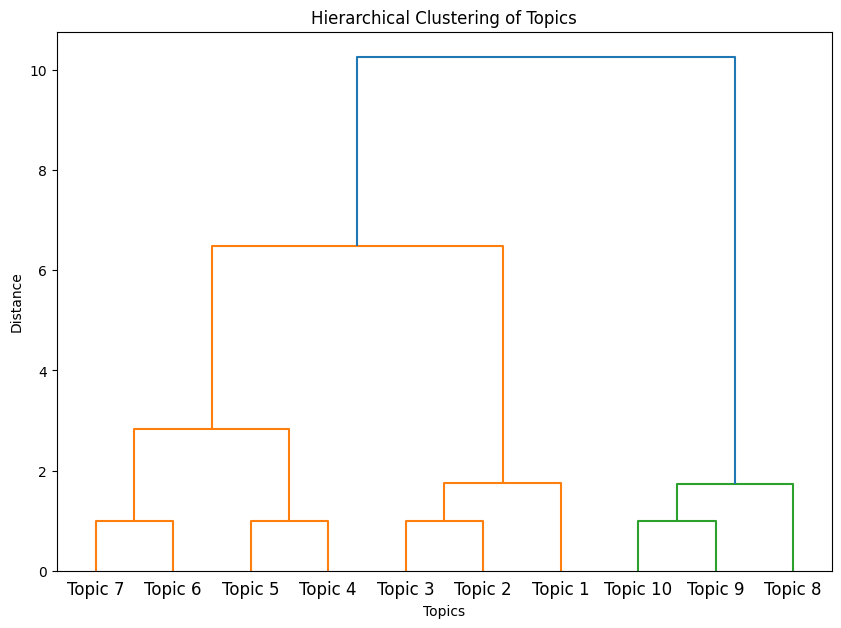

In [ ]:
#Visualization-2: Hierarchical Clustering of Topics
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

topic_distributions = np.array([optimal_model.get_document_topics(doc) for doc in corpus])

topic_means = np.mean(topic_distributions, axis=0)

linked = linkage(topic_means, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=[f'Topic {i + 1}' for i in range(optimal_k)], distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering of Topics')
plt.xlabel('Topics')
plt.ylabel('Distance')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


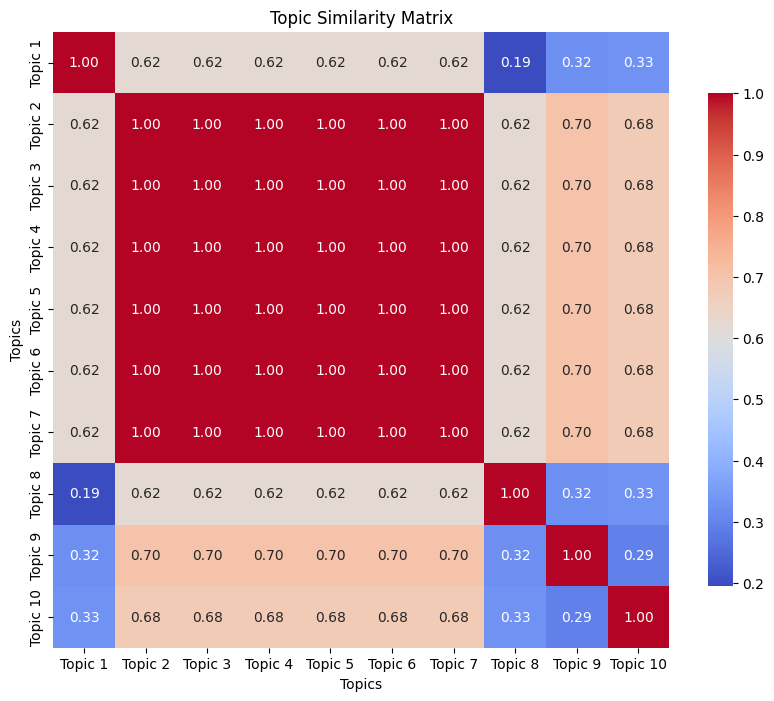

In [ ]:
#Visualization-3: Similarity Matrix
!pip install seaborn
!pip install scikit-learn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

topic_distributions = optimal_model.get_topics()

similarity_matrix = cosine_similarity(topic_distributions)

similarity_df = pd.DataFrame(similarity_matrix,
                              index=[f'Topic {i + 1}' for i in range(optimal_k)],
                              columns=[f'Topic {i + 1}' for i in range(optimal_k)])

plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Topic Similarity Matrix')
plt.xlabel('Topics')
plt.ylabel('Topics')
plt.show()

**Visualization-1: Intertopic Distance Map** -
An effective visualization tool for comprehending the connections between the topics produced by the LDA model is the Intertopic Distance Map. Every point in this two-dimensional space represents a different topic, and the distance between points shows how similar they are to one another. The map is produced by using dimensionality reduction methods like t-SNE or Multidimensional Scaling (MDS), which assist in converting high-dimensional similarity metrics into an understandable format. Topics that are near to one another have similar word distributions, which can be used to find clusters of connected subjects. In contrast, isolated points highlight distinct subjects that differ greatly from one another and offer important clues about the dataset's underlying structure.

**Visualization-2: Hierarchical Clustering of Topics** -
Hierarchical Clustering offers another perspective on topic relationships by organizing them into a tree-like structure known as a dendrogram. This method utilizes a distance metric, such as cosine distance, to gauge similarities between topics. Starting with each topic as an individual cluster, the agglomerative approach progressively merges the most similar clusters until a single cluster containing all topics is formed. The resulting dendrogram visually represents these relationships, with the height of the vertical lines indicating the degree of similarity; shorter lines suggest closer relationships among topics. By selecting a threshold for merging, researchers can determine the optimal number of clusters, which aids in the interpretation of the dataset and highlights how themes are interconnected.

**Visualization-3: Similarity Matrix** -
By offering a thorough numerical depiction of the topics' similarities, the Similarity Matrix measures the connections between them. This matrix, which is usually created using cosine similarity, gives each pair of subjects a score between 0 and 1, with higher numbers denoting greater similarity. The similarity matrix, which is displayed as a heatmap, makes it possible to quickly identify related topics because values near 0 indicate separate themes while values around 1 indicate great similarity. In addition to showing how topics are related to one another, this matrix helps identify how many distinct themes are present in the data. Based on the heatmap's similarity scores, researchers can strategically determine which subjects might benefit from more investigation or study.


## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [ ]:
# Write your code here
"""
When comparing the results from three topic modeling algorithms—LDA (Latent Dirichlet Allocation), LSA (Latent Semantic Analysis), and BERTopic—it becomes clear that LDA performed
the best. The LDA model identified an optimal number of 10 topics, with coherence scores ranging from 0.4007 to 0.4063. These scores indicate that the topics were well-defined and
made sense together, capturing various themes in the dataset, such as customer feelings toward products. For example, some common words across the topics included "like," "terrible,"
"expected," and "service." This variety shows that LDA successfully understood the richness of opinions expressed in the reviews. In contrast, LSA identified only 2 topics and
produced coherence scores that were reported as nan (not a number). This suggests that LSA struggled to effectively analyze the dataset, likely due to limitations in how it processes
text. As a result, the topics generated by LSA lacked depth and did not provide meaningful insights. Although it created some topics, the limited variety indicated that it was unable
to capture the complexities of the data. The BERTopic model also fell short, reporting an optimal number of 0 topics and providing no coherence scores. This means the model could
not find any meaningful topics in the data, possibly due to issues with the parameters or the text itself. Since BERTopic relies on clustering techniques, its inability to generate
topics suggests it was not suitable for this specific dataset. Overall, LDA emerged as the most effective approach for topic modeling here, as it produced a wide range of coherent
topics that provided valuable insights. In contrast, both LSA and BERTopic struggled to deliver meaningful results, highlighting the importance of choosing the right algorithm based
on the characteristics of the data being analyzed.

"""

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'\nWhen comparing the results from three topic modeling algorithms—LDA (Latent Dirichlet Allocation), LSA (Latent Semantic Analysis), and BERTopic—it becomes clear that LDA performed\nthe best. The LDA model identified an optimal number of 10 topics, with coherence scores ranging from 0.4007 to 0.4063. These scores indicate that the topics were well-defined and \nmade sense together, capturing various themes in the dataset, such as customer feelings toward products. For example, some common words across the topics included "like," "terrible,"\n"expected," and "service." This variety shows that LDA successfully understood the richness of opinions expressed in the reviews. In contrast, LSA identified only 2 topics and\nproduced coherence scores that were reported as nan (not a number). This suggests that LSA struggled to effectively analyze the dataset, likely due to limitations in how it processes\ntext. As a result, the topics generated by LSA lacked depth and did not provide meaningfu

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:
Looking back on this exercise, I found it helpful to work with text data and different topic modeling methods. I learned how to pull out important features from text using
techniques like LDA, LSA, and BERTopic, which showed me how each method finds topics in a dataset. I did run into some challenges, especially with the LSA model, which gave
me nan for coherence scores, and BERTopic, which didn't provide useful results. These problems highlighted the need for good data preparation and adjusting settings.
Overall, this exercise is very relevant to my studies in natural language processing (NLP) because figuring out key themes in large text collections can help with things like
understanding customer feedback or organizing information. This assignment has enhanced my skills and helped me appreciate the challenges of working with text data in NLP.

'''

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


"\nPlease write you answer here:\nLooking back on this exercise, I found it helpful to work with text data and different topic modeling methods. I learned how to pull out important features from text using\ntechniques like LDA, LSA, and BERTopic, which showed me how each method finds topics in a dataset. I did run into some challenges, especially with the LSA model, which gave\nme nan for coherence scores, and BERTopic, which didn't provide useful results. These problems highlighted the need for good data preparation and adjusting settings. \nOverall, this exercise is very relevant to my studies in natural language processing (NLP) because figuring out key themes in large text collections can help with things like \nunderstanding customer feedback or organizing information. This assignment has enhanced my skills and helped me appreciate the challenges of working with text data in NLP.\n\n"